In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df_atvi = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy = pd.read_csv("spy_weekly_return_volatility.csv")

In [3]:
def train_on_yr2(df):
    # Red -> 1; Green -> 0
    df_train = df[df["Year"] == 2021]
    X_train = df_train[["mean_return", "volatility"]]
    y_train = df_train[["Label"]].values.flatten()
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    
    dct_clf = DecisionTreeClassifier(criterion = "entropy")
    dct_clf.fit(X_train, y_train)
    
    df_test = df[df["Year"] == 2022]
    X_test = df_test[["mean_return", "volatility"]]
    y_test = le.fit_transform(df_test[["Label"]].values.flatten())
    y_pred = dct_clf.predict(X_test)
    return y_test, y_pred

In [7]:
def metrics_bnh_vs_clf(df, stocks):
    y_test, y_pred = train_on_yr2(df)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=["Green", "Red"]).plot()
    tp = conf_matrix[0][0]
    tn = conf_matrix[1][1]
    fp = conf_matrix[1][0]
    fn = conf_matrix[0][1]
    tpr = tp/(tp + fn)
    tnr = tn/(tn + fp)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy -> {round(100*acc, 2)} %")
    print(f"Recall -> {round(100*tpr, 2)} %")
    print(f"Specificity -> {round(100*tnr, 2)} %")
    df_yr2 = df[df["Year"] == 2022]
    ret_yr2 = df_yr2[["mean_return"]].values.flatten()
    i1, i2 = 100, 100
    bnh, dct = [], []
    for i in range(y_pred.shape[0]):
        if y_pred[i] == 0:
            i2 = i2*(1+ret_yr2[i]/100)
        i1 = i1*(1+ret_yr2[i]/100)
        bnh.append(i1)
        dct.append(i2)
    
    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.title(f"BnH Strategy for {stocks} for year 2")
    plt.ylabel("Returns")
    plt.xlabel("Weeks")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(dct)
    plt.title(f"Classifier Strategy for {stocks} for year 2")
    plt.ylabel("Returns")
    plt.xlabel("Weeks")
    plt.show()
    
    print(f"Final Amount for BnH -> $ {round(i1, 2)}")
    print(f"Final Amount by trading according to labels -> $ {round(i2, 2)}")

Accuracy -> 53.85 %
Recall -> 66.67 %
Specificity -> 45.16 %


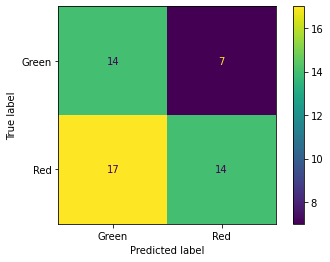

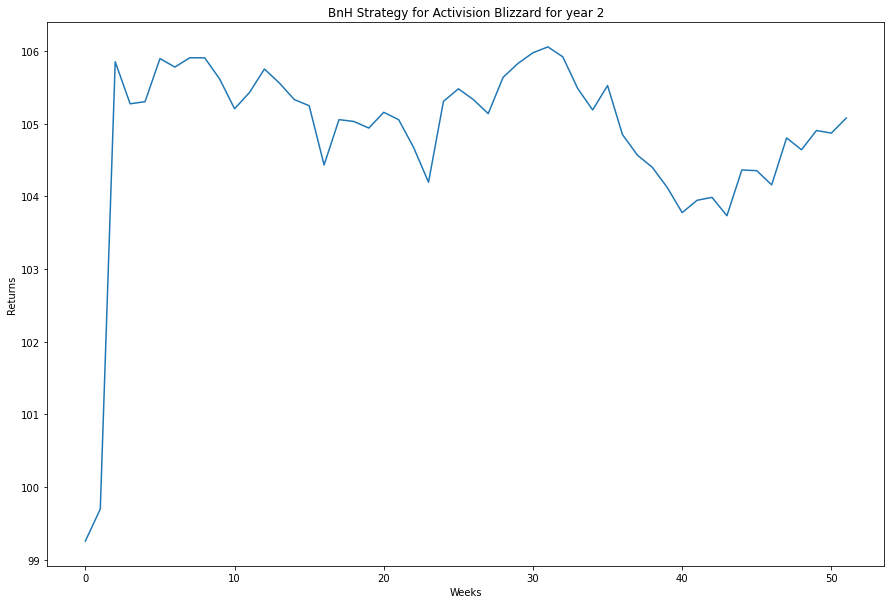

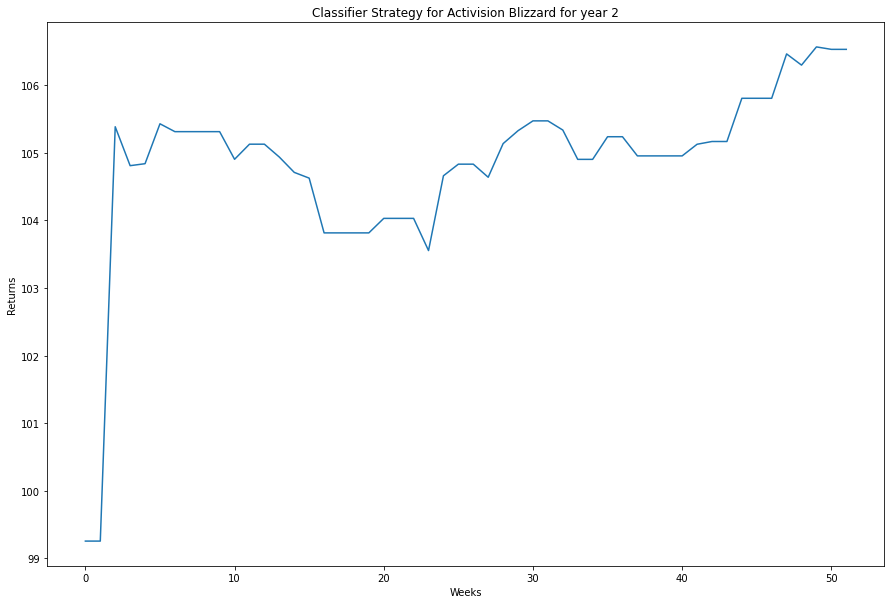

Final Amount for BnH -> $ 105.08
Final Amount by trading according to labels -> $ 106.53


In [8]:
metrics_bnh_vs_clf(df_atvi, "Activision Blizzard")

Accuracy -> 42.31 %
Recall -> 83.33 %
Specificity -> 20.59 %


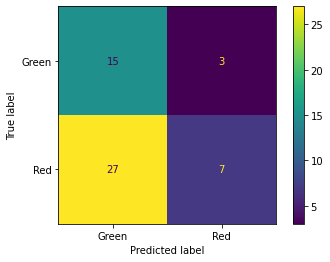

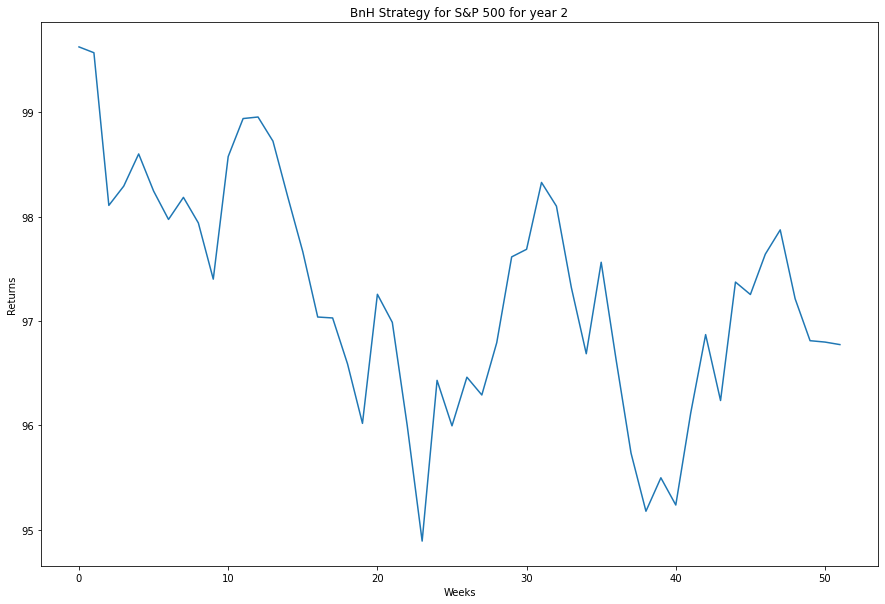

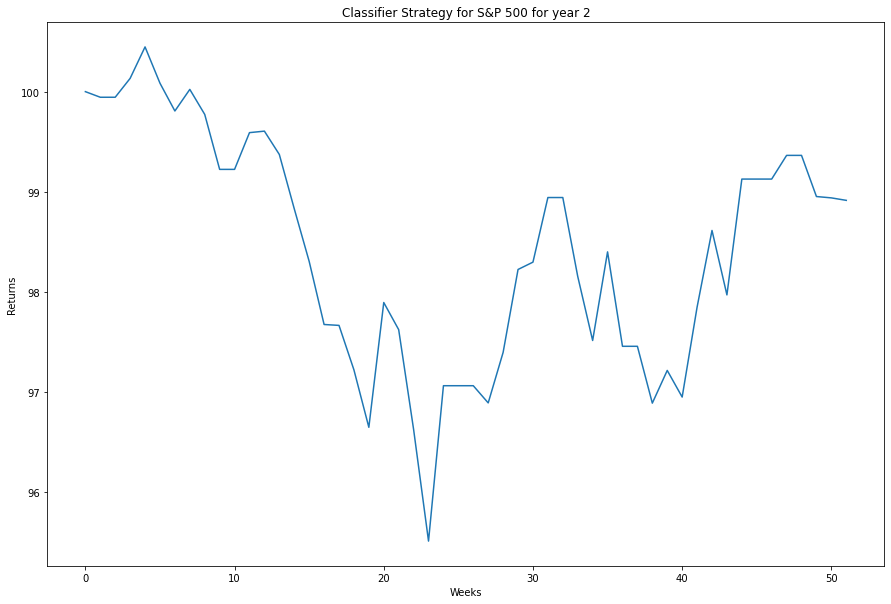

Final Amount for BnH -> $ 96.77
Final Amount by trading according to labels -> $ 98.91


In [9]:
metrics_bnh_vs_clf(df_spy, "S&P 500")